# KSW data exploration and NN training

In [12]:
# auto-load changes in imported modules
%load_ext autoreload
%autoreload 2

# plotting utilities
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (40.0, 20.0)

# numerical / data IO
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix
# Use the maximum number of threads for sknn scripts
from sknn.platform import threading
from sknn.mlp import Regressor
from sknn.mlp import Layer
# advanced display
from IPython.display import display
# point path to where csv files are
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

# load own modules
from python.ksw_misc import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


First tried reading csv with csv.reader() but afterwards with Panda directly, does the convertions to float and infers the header.

Only the first Series is needed as for the first manual data taking, we've only been pulsing one magnet (with only one user/wave really).

In [29]:
#datadf = read_raw_measurements('../data/wave1_gen1_','.csv', 1, 19,'Voltage - PXI1Slot5/ai0', 'infer')
#paramdf = read_raw_measurements('../data/wave1_gen1_sett_','', 1, 19, 1)
# trying out some other files ... from new vi app; remove below lines afterwards
wavef = []
param = []
wavef.append(read_raw_measurements('../data/trig1_delay_tests',' w', 0, 15, 1))
param.append(read_raw_measurements('../data/trig1_delay_tests',' p', 0, 15, 1, None, 0))

wavef.append(read_raw_measurements('../data/v1reference_full_20vincr',' w', 0, 55, 1))
param.append(read_raw_measurements('../data/v1reference_full_20vincr',' p', 0, 55, 1, None, 0))

../data/v1reference_full_20vincr0 p  \
0                                                     
TrigALL_delay                                   100   
Trig1_delay                                    1500   
Trig2a_delay                                  15500   
Trig2b_delay                                  15500   
Trig3_delay                                    6500   
TrigALL_lenght                               150000   
Trig1_lenght                                  14000   
Trig2a_lenght                                  1000   
Trig2b_lenght                                  1000   
Trig3_lenght                                   2000   
V5_Reference                                    100   
V3_Reference                                    100   
V2B_Reference                                  1000   
V2A_Reference                                  1000   
V1_Reference                                   1000   
CONTROL C4A 1                                     0   
CONTROL C4B 1                                     1   
BYPASS 1                                          1   

                ../data/v1reference_full_20vincr1 p  \
0                                                     
TrigALL_delay                                   120   
Trig1_delay                                    1500   
Trig2a_delay                                  15500   
Trig2b_delay                                  15500   
Trig3_delay                                    6500   
TrigALL_lenght                               150000   
Trig1_lenght                                  14000   
Trig2a_lenght                                  1000   
Trig2b_lenght                                  1000   
Trig3_lenght                                   2000   
V5_Reference                                    100   
V3_Reference                                    100   
V2B_Reference                                  1000   
V2A_Reference                                  1000   
V1_Reference                                   1000   
CONTROL C4A 1                                     0   
CONTROL C4B 1                                     1   
BYPASS 1                                          1   

                ../data/v1reference_full_20vincr2 p  \
0                                                     
TrigALL_delay                                   140   
Trig1_delay                                    1500   
Trig2a_delay                                  15500   
Trig2b_delay                                  15500   
Trig3_delay                                    6500   
TrigALL_lenght                               150000   
Trig1_lenght                                  14000   
Trig2a_lenght                                  1000   
Trig2b_lenght                                  1000   
Trig3_lenght                                   2000   
V5_Reference                                    100   
V3_Reference                                    100   
V2B_Reference                                  1000   
V2A_Reference                                  1000   
V1_Reference                                   1000   
CONTROL C4A 1                                     0   
CONTROL C4B 1                                     1   
BYPASS 1                                          1   

                ../data/v1reference_full_20vincr3 p  \
0                                                     
TrigALL_delay                                   160   
Trig1_delay                                    1500   
Trig2a_delay                                  15500   
Trig2b_delay                                  15500   
Trig3_delay                                    6500   
TrigALL_lenght                               150000   
Trig1_lenght                                  14000   
Trig2a_lenght                                  1000   
Trig2b_lenght                                  1000   
Trig3_lenght                                   2000   
V5_Reference                                    100  

feature with most variance is TrigALL_delay


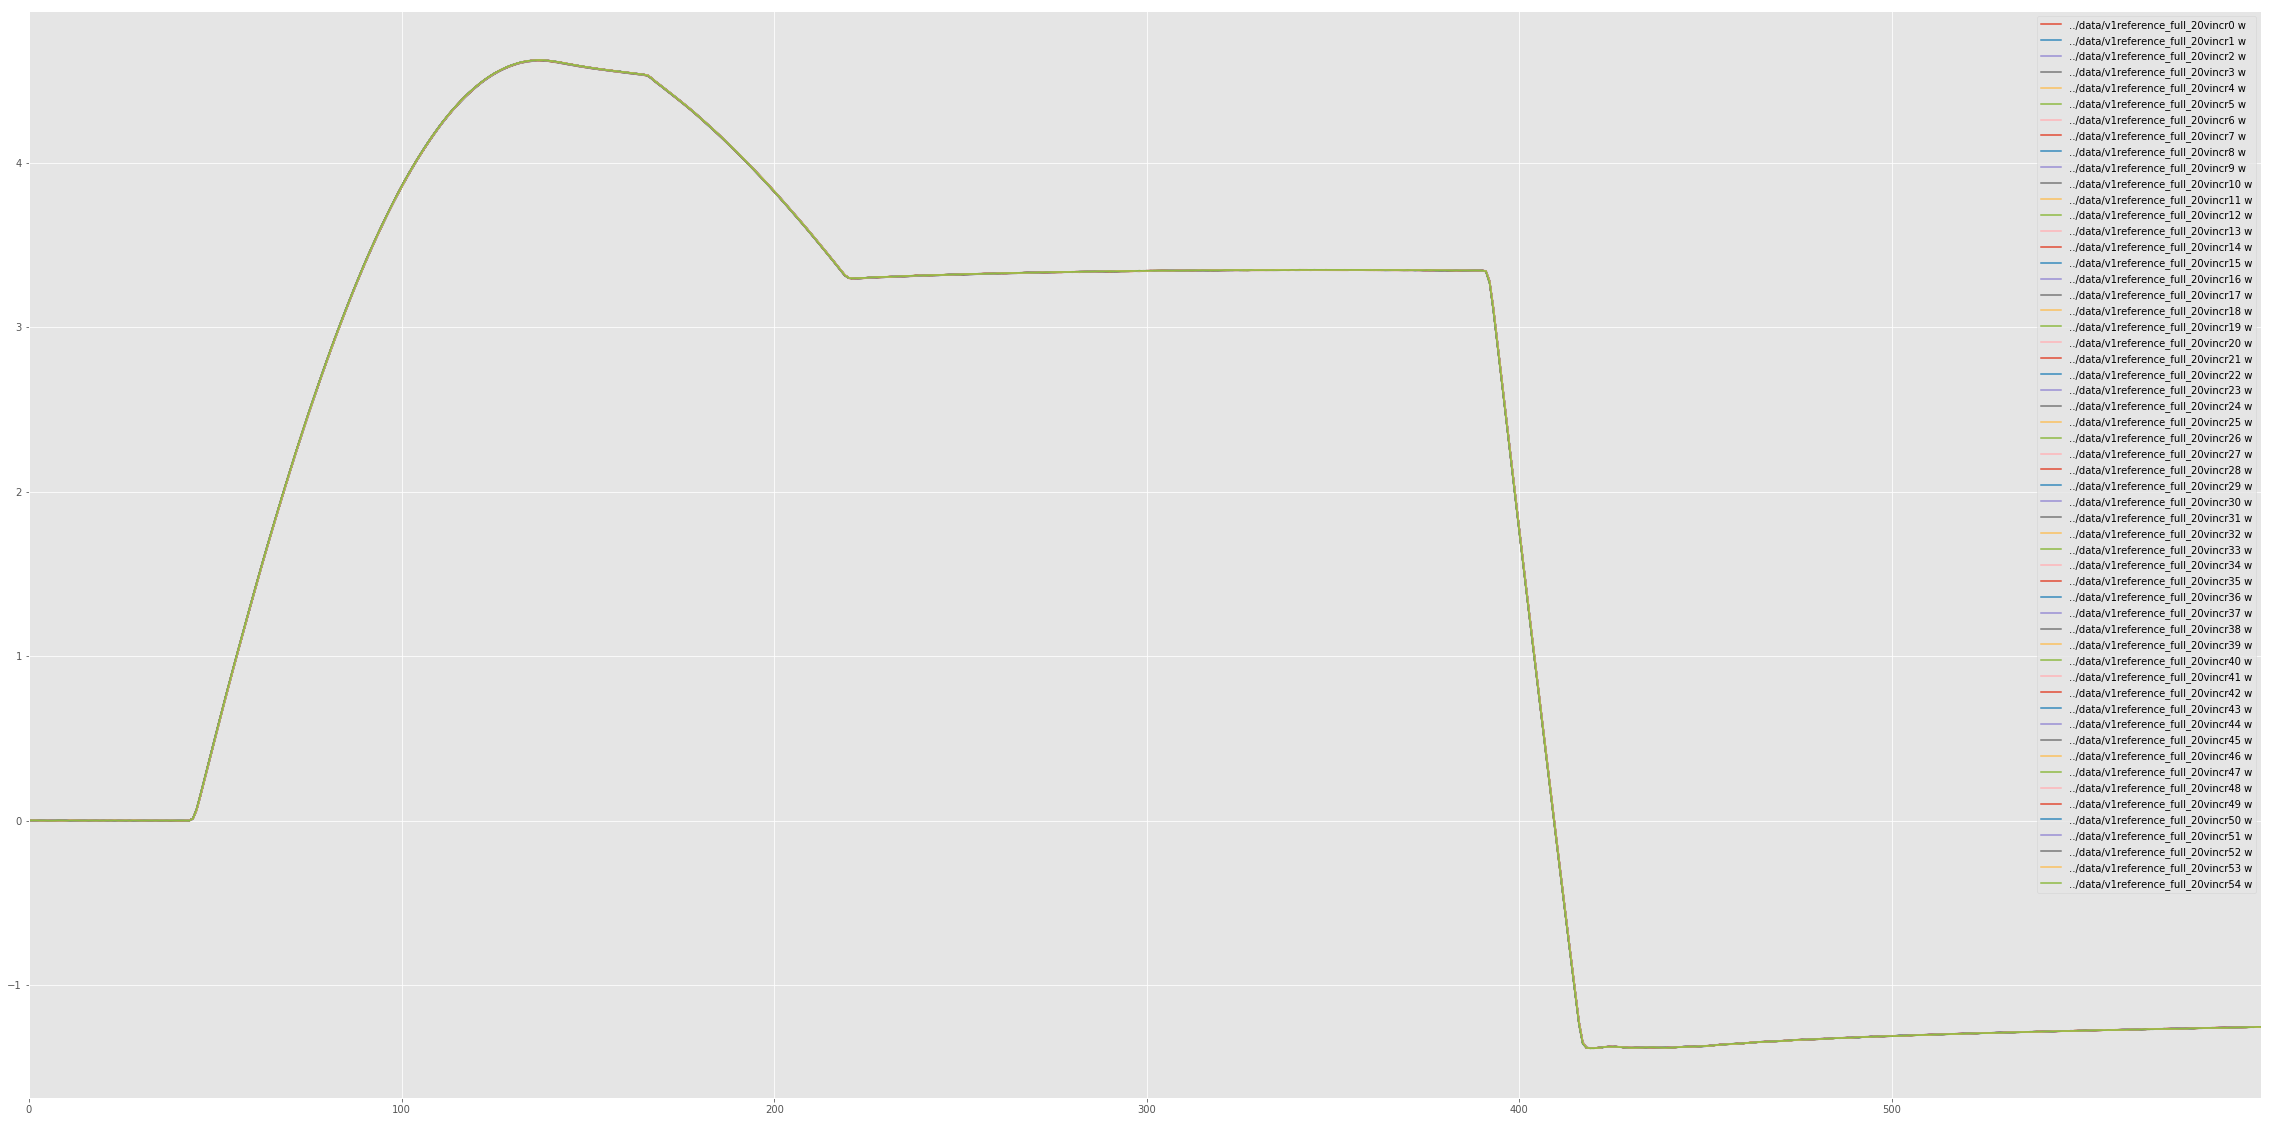

In [56]:
datadf = wavef[1] #pd.concat(wavef, axis=1) 
paramdf = param[1] #pd.concat(param, axis=1) 

datadf.iloc[:600,0:].plot(legend=True)
#display(datadf.describe())
#print(datadf.shape)
display(paramdf)
print("feature with most variance is %s" % paramdf.transpose().std().idxmax())
#display(paramdf.transpose().describe())

In [34]:
# transpose; the generator waveforms will be the 'model labels'
Xl = datadf.transpose()
yl = paramdf.transpose()

# split training data
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xl, yl)

# scale the inputs - remove the mean and scale to standard deviation
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train model
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(12,12),max_iter=5000)
mlp.fit(X_train,y_train)

# test the trained model
predictions = mlp.predict(X_test)

### displaying MLPRegressor results below, not too bad for a first try
check especially column 12 which has the most variance
more data needed! Also NN configuration to be finetuned

In [76]:
y_pred_pd = pd.DataFrame(data=predictions[0:,0:])
# Mix type of y not allowed, got types {'multiclass-multioutput', 'continuous-multioutput'}
#print(classification_report(y_test,predictions))
#print(confusion_matrix(y_test,y_pred_pd))

scoreddf = pd.DataFrame(abs(y_pred_pd.values - y_test.values), columns=y_test.columns, index=y_test.index)
print("Worst-scoring label is %s" % scoreddf.sum().idxmax())
print("After scoring, sum-of-difference metric is %i" % scoreddf.sum().sum())

Worst-scoring label is TrigALL_lenght
After scoring, sum-of-difference metric is 1966444


the below scripts are obsolete I think; keeping for now..

# First trying with x=y.index

In [ ]:
# Design Network
hiddenLayer1 = Layer("Sigmoid", units=25)
#hiddenLayer2 = Layer("Sigmoid", units=10)
outputLayer = Layer("Linear", units=1)
nn = Regressor([hiddenLayer1, outputLayer], learning_rule='sgd',
               learning_rate=.01,batch_size=1,loss_type="mse")

# scale the features
X = paramdf
y = datadf
X_scaled = preprocessing.scale(X)

# Train Model
X_nn = y.index.values
X_nn.shape = (len(X_nn),1)
display(X_nn)
y_nn = y['../data/wave1_gen1_1.csv'].values
y_nn.shape = (len(y_nn),1)
display(y_nn)

# scale x - will not work otherwise!
X_nns = preprocessing.scale(X_nn)
display(X_nns)
# train
nn.fit(X_nns,y_nn)

# Predict
predictions = nn.predict(X_nns)

# Visualize
plt.plot(y_nn)
plt.plot(predictions)
plt.show()

In [ ]:
display(X_scaled[0])

In [ ]:
# Design Network
hiddenLayer1 = Layer("Sigmoid", units=25)
#hiddenLayer2 = Layer("Sigmoid", units=10)
outputLayer = Layer("Linear", units=1)
nn = Regressor([hiddenLayer1, outputLayer], learning_rule='sgd',
               learning_rate=.01,batch_size=1,loss_type="mse")

# Train Model
X_nn = X_scaled[0]
X_nn.shape = (len(X_nn),1)
display(X_nn)
y_nn = y['../data/wave1_gen1_1.csv'].values
y_nn.shape = (len(y_nn),1)
display(y_nn)

# scale x - will not work otherwise!
X_nns = preprocessing.scale(X_nn)
display(X_nns)
# train
nn.fit(X_nns,y_nn)
## AssertionError: Expecting same number of input and output samples.

# Predict
predictions = nn.predict(X_nns)

# Visualize
plt.plot(y_nn)
plt.plot(predictions)
plt.show()